In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

#### Example 1

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42,stratify=iris.target)

In [4]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train);

In [5]:
model.score(x_train,y_train)

1.0

In [6]:
model.score(x_test,y_test)

0.9333333333333333

In [7]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train);

In [8]:
model.score(x_train,y_train)

0.9714285714285714

In [9]:
model.score(x_test,y_test)

0.9777777777777777

Text(0, 0.5, 'Accuracy')

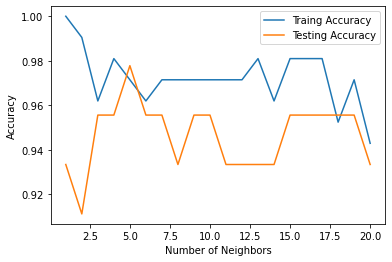

In [10]:
n = np.arange(1,21)

atrain = np.empty(20)   
atest  = np.empty(20)

for i,k in enumerate(n):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    atrain[i]= model.score(x_train,y_train)
    atest[i] = model.score(x_test,y_test)
    
plt.plot(n , atrain , label = 'Traing Accuracy')
plt.plot(n , atest  , label = 'Testing Accuracy')   
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

#### Example 2

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test  = sc.transform(X_test)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,  marker=markers[idx], label=cl)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')

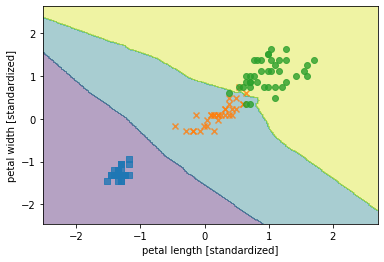

In [21]:
plot_decision_regions(X_train, y_train,classifier=knn);

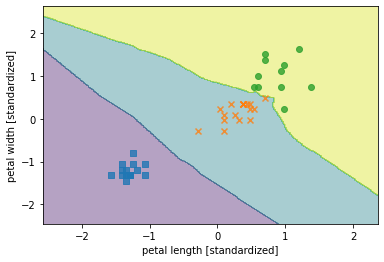

In [22]:
plot_decision_regions(X_test, y_test,classifier=knn)